In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


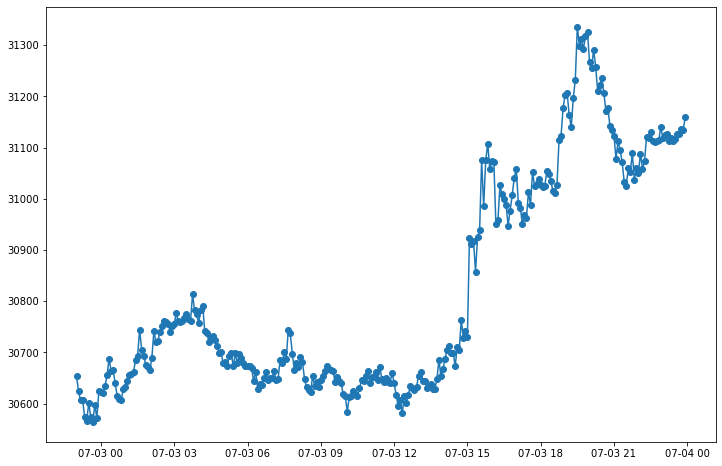

In [9]:
data = data[['open']]
plt.figure(figsize=(12, 8))
plt.plot(data[-300:], marker='o', label='open')
plt.show()

In [10]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import gamma
from collections import defaultdict
from random import choice, random, randint

In [11]:
def kth_element(arr, l: int, r: int, k: int):
    if r - l == 1:
        return arr[l]
    print(l, r)
    pivot = choice(arr[l: r])
    lq = l
    rq = r - 1
    while lq <= rq:
        if arr[lq] <= pivot:
            lq += 1
        else:
            arr[lq], arr[rq] = arr[rq], arr[lq]
            rq -= 1
    
    if k < lq - l:
        return kth_element(arr, l, lq, k)
    return kth_element(arr, lq, r, k - (lq - l))

def get_kth_element(arr, k):
    # k = min(k, len(arr))
    # print(k)
    # return kth_element(arr, 0, len(arr), k)
    return sorted(arr)[k]

# a = [1] * 100
# a = [2, 2, 3 , 3, 1, 1, 4]
# print(get_kth_element(a, 4))

<b>Functions for clusters and vectors</b>

In [12]:
def volume(r, m):
    return np.pi ** (m / 2) * r ** m / gamma(m / 2 + 1)



In [13]:
class Wishart: 
    radius: int
    u: int
    labels: list
    
    def __init__(self, r: int, u: int):
        self.radius = r
        self.u = u
        
    def significant(self, cluster, p):
        dif = [abs(p[i] - p[j]) for i, j in zip(cluster, cluster)]
        return max(dif) >= self.u
    
        
    def fit(self, x):
        n = len(x)
        m = len(x[0])
        dist = squareform(pdist(x))
        dr = []
        # print(dist)
        for i in range(n):
            dr.append(get_kth_element(dist[i], self.radius - 1))
        
        p = [self.radius / (volume(i, m) * n) for i in dr]
        last = 1
        labels = np.full(n, 0)
        completed = {0: False}
        vertices = []
        for d, i in sorted(zip(dr, range(n))):
            neighbours = []
            neighbours_w = []
            clusters = defaultdict(list)
            for j in vertices:
                if dist[i][j] <= d:
                    neighbours.append(j)
                    neighbours_w.append(labels[j])
                    clusters[labels[j]].append(j)
            vertices.append(i)
            if len(neighbours) == 0:
                labels[i] = last
                completed[last] = False
                last += 1
            elif len(neighbours_w) == 1:
                wj = neighbours_w[0]
                if completed[wj]:
                    labels[i] = 0
                else:
                    labels[i] = wj
            else:
                if all([completed[l] for l in neighbours_w]):
                    labels[i] = 0
                    continue
                significant_clusters = set(wj for wj in neighbours_w if self.significant(clusters[wj], p))
                if len(significant_clusters) > 1:
                    labels[i] = 0
                    for wj in neighbours_w:
                        if wj in significant_clusters:
                            completed[wj] = (wj != 0)
                            continue
                        for v in clusters[wj]:
                            labels[v] = 0
                else:
                    if len(significant_clusters) == 1:
                        c1 = next(iter(significant_clusters))
                    else:
                        c1 = min(neighbours_w)
                    labels[i] = c1
                    for wj in neighbours_w:
                        for v in clusters[wj]:
                            labels[v] = c1
        self.labels = labels
        return labels
    

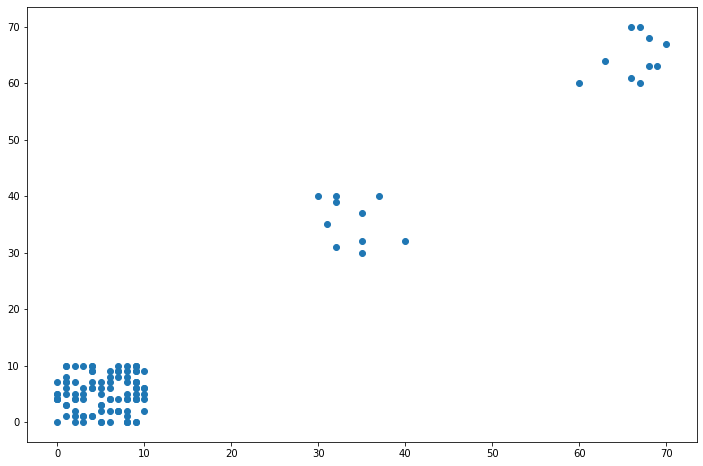

In [14]:
x = [randint(0, 10) for i in range(100)] + [randint(30, 40) for i in range(10)] + [randint(60, 70) for i in range(10)]
y = [randint(0, 10) for i in range(100)] + [randint(30, 40) for i in range(10)] + [randint(60, 70) for i in range(10)]

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.show()

[ 1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1
  3  1  1  1  3  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
  1  1  1  1  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10]


/tmp/ipykernel_25689/1497176283.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


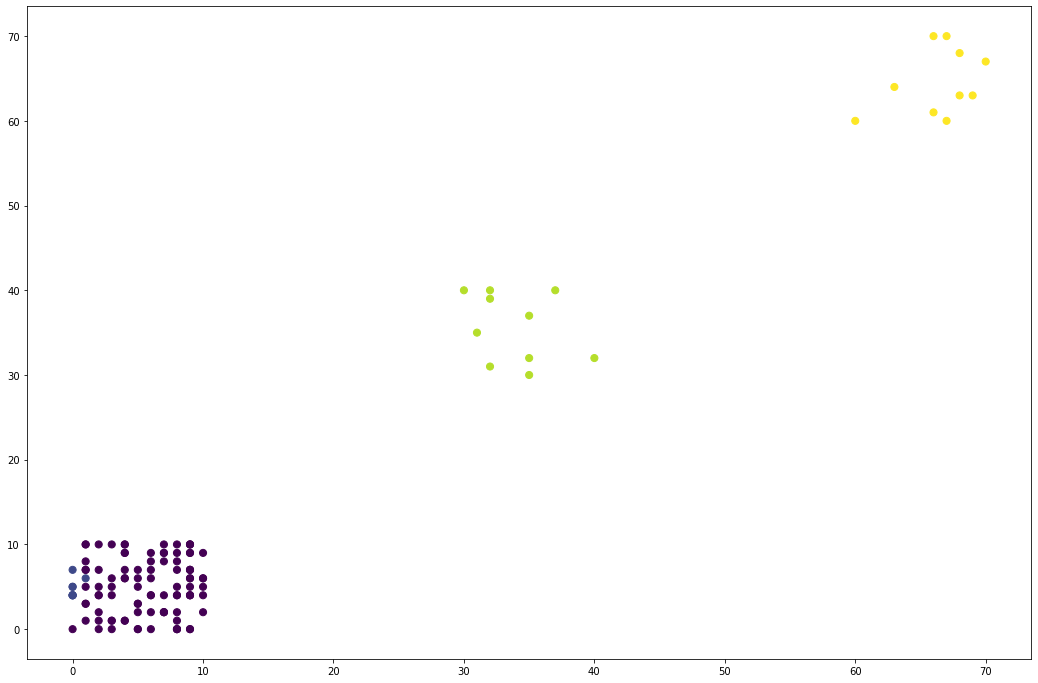

In [15]:
wishart = Wishart(7, 0.2)
# w = wishart.fit([[0, 1], [2, 3], [3, 5], [4, 2]])
labels = wishart.fit(list(zip(x, y)))
# plt.figure(figsize=(12, 8))
print(labels)
# plt.scatter(x, y, w)
# plt.text(x[0],y[0],w[0], ha="center", va="center")
# for i in range(2):
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=labels,s=50)
#     plt.text(x[i],y[i],w[i], ha="center", va="center")
fig.show()

In [16]:
from ipynb.fs.full.indexes import MeasureIndexes
# points = list(zip(x, y))
# points = [list(i) for i in points]
# print(points)
print(labels)
points = np.array([[1, 2], [2, 1], [1, 1], [2, 2], [5, 5], [5, 6], [7, 5]])
cluster = np.array([0, 0, 0, 0, 1, 1, 1])
print(len(x), len(labels))
calculator = MeasureIndexes(points, cluster)

res = calculator.Calculate()
for key in res:
    print(key, res[key])


RS 0.9115323854660348
G 37.17556877593904
CH 51.51785714285713
D 0.0
S 0.7488352839464326
DB 0.30519670878508837
XB 0.023768259470165882
[ 1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  1  1  1  1  1  1  1
  3  1  1  1  3  3  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3
  1  1  1  1  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10]
120 120
RS 0.9115323854660348
G 37.17556877593904
CH 51.51785714285713
D 0.0
S 0.7488352839464326
DB 0.30519670878508837
XB 0.023768259470165882


<b>Generating motifs and patterns</b>

In [17]:
def GenerateMotifsByPattern(pattern, t):
  # Returns motifs according to given pattern
  L = len(pattern)
  idx = []
  idx.append(0)
  for i in range(L):
    idx.append(idx[len(idx) - 1] + pattern[i])
  motifs = []
  while idx[len(idx) - 1] != t + 1:
    motifs.append(idx.copy())
    for i in range(len(idx)):
      idx[i] += 1
  return motifs

def IteratePatterns(patterns, pattern, i, L, sum, Kmax):
  # Generate all patterns with sum <= Kmax and length = L - 1
  if i == L - 1:
    patterns.append(pattern.copy())
  else:
    for j in range(1, Kmax - sum + 1):
      pattern[i] = j
      IteratePatterns(patterns, pattern, i + 1, L, sum + j, Kmax)

def GenPatterns(patterns, pattern, i, L, Kmax):
  if i == L - 1:
    patterns.append(pattern.copy())
  else:
    for j in range(1, Kmax + 1):
      pattern[i] = j
      GenPatterns(patterns, pattern, i + 1, L, Kmax)

def GenerateAllMotifs(Kmax, L, t):
  # Returns map [pattern, [motifs...]]
  patterns = []
  pattern = []
  for i in range(L - 1):
    pattern.append(0)
  # IteratePatterns(patterns, pattern, 0, L, 0, Kmax)
  GenPatterns(patterns, pattern, 0, L, Kmax)
  # print(len(patterns))
  motifsByPatterns = []
  for p in patterns:
    motifs = GenerateMotifsByPattern(p, t)
    motifsByPatterns.append([p, motifs])
  return motifsByPatterns


# print(GenPatterns([], list(range(2)), 0, 2, 10))
# q = GenerateAllMotifs(10, 4, 100)
# print(q[:100])

<b>Get centers for Clusters</b>

In [18]:
from itertools import groupby
WISHART_R = 10
WISHART_U = 0.2
def get_centers(x_train):
    N = len(x_train[0])
    wishart = Wishart(WISHART_R, WISHART_U)
    labels = wishart.fit(x_train)
    sorted_by_cluster = sorted(range(len(labels)), key=lambda x: labels[x])
    centers = []
    for wi, cluster in groupby(sorted_by_cluster, lambda x: labels[x]):
        cluster = list(cluster)
        center = np.full(N, 0.0)
        for i in cluster:
            center += x_train[i]
        centers.append(center / len(cluster))

    return centers
    

In [19]:
from statistics import mean
size = len(data)
train_data = data[:int(size * 0.7)]
test_data = data[int(size * 0.7):]

In [50]:
def get_val_for_pattern_and_pos(data: np.array, pattern: list, pos: int):
    val = []
    sum = 0
    for i in range(len(pattern) - 1, -1, -1):
      sum += pattern[i]
      val.append(data[pos - sum])
    val = val[::-1]
    return np.array(val)

def get_val_for_motifs(data: np.array, motif: list):
    val = []
    for i in motif:
        val.append(data[i])
    return np.array(val)


def mode(a):
    return max(set(a), key=a.count)

def base_prediction(data, h: int, L: int = 3, kmax: int = 10, eps: float = 40):
    t = len(data)
    prediction = data
    prediction = np.resize(prediction, t + h)
    # print(prediction)
    for i in range(t):
        prediction[i] = data[i]
    possible_values = [[] for i in range(h)]
    for i in range(h):
        for pattern, all_motifs  in GenerateAllMotifs(kmax, L, t - 1):
            val_for_pattern = get_val_for_pattern_and_pos(prediction, pattern, t + i)
            val_for_pattern = val_for_pattern - [val_for_pattern[0]]
          
            centers = get_centers([get_val_for_motifs(prediction, motif) for motif in all_motifs])

            for c in centers:
              dist = np.linalg.norm(c[:-1] - val_for_pattern)
              if dist < eps:
                  possible_values[i].append(c[-1])
        
        # sorted(possible_values)
        # print("aa")
        # print(len(possible_values[i]))
        if len(possible_values[i]):
            # print(possible_values[i])
            prediction[t + i] = mode(possible_values[i])
        # print(prediction[t + i])
    return prediction


# base_prediction(test_data[-40:], 5)


In [52]:
h = 10
print(len(train_data))
prediction = base_prediction(train_data['open'][-100:], h, L=3)

# print(prediction[-h:])
plt.plot(list(train_data['open'][-100:]), 'g', label='prediction')
print(prediction[-h:])
plt.figure(figsize=(18, 12))
plt.plot(prediction[-h:], 'r', label='open')
plt.plot(list(test_data['open'][:h]), 'b', label='prediction')
# plt.scatter(list(range(0, h)), list(prediction[-h:]), s=50, c='r', label='prediction')
# # plt.plot(test_data, 'b', label='prediction')
plt.show()

3225


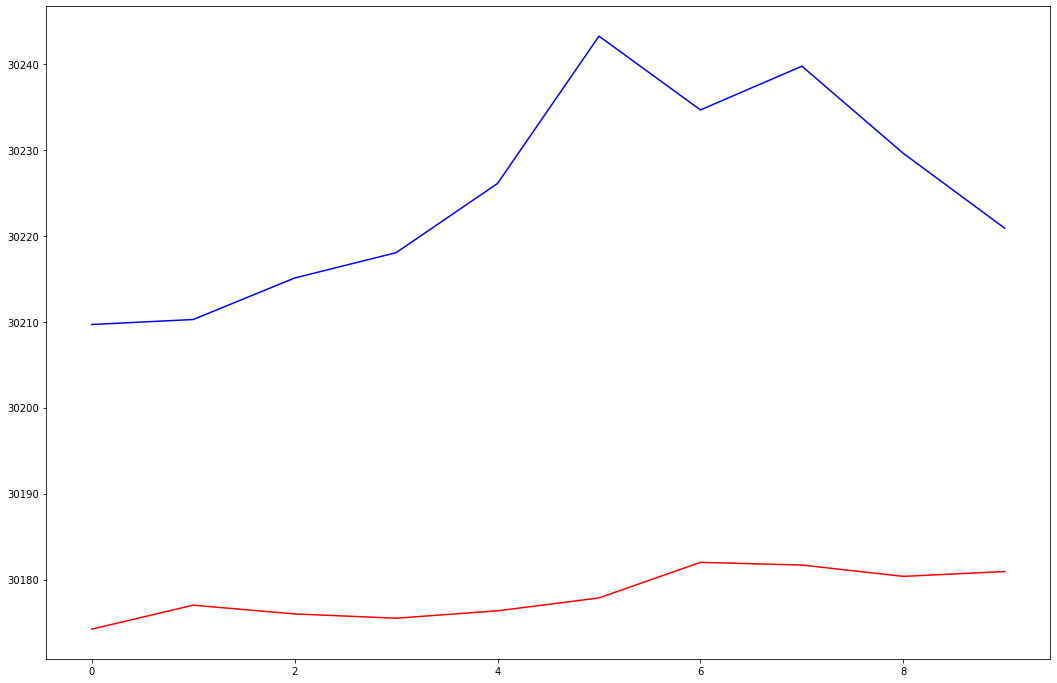

In [ ]:
preds = [30174.22415798, 30177.01295284, 30175.99488477, 30175.49951717,
 30176.35611112, 30177.85947034, 30181.99826561, 30181.68669159,
 30180.3666719,  30180.9335379]
plt.figure(figsize=(18, 12))
plt.plot(preds, 'r', label='prediction')
plt.plot(list(test_data['open'][:h]), 'b', label='prediction')

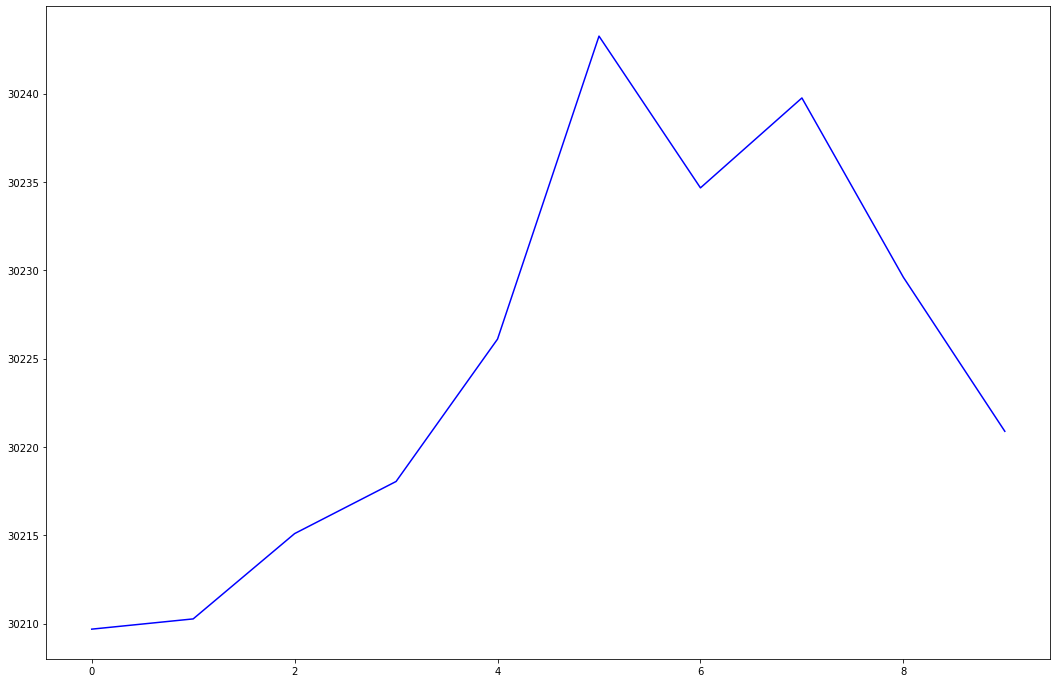

In [ ]:
preds = [30174.22415798, 30177.01295284, 30175.99488477, 30175.49951717,
 30176.35611112, 30177.85947034, 30181.99826561, 30181.68669159,
 30180.3666719,  30180.9335379]
plt.figure(figsize=(18, 12))
plt.plot(list(test_data['open'][:h]), 'b', label='prediction')